In [1]:
import numpy as np
import properties
import matplotlib.pyplot as plt
import warnings

from string import ascii_lowercase
from SimPEG import Maps, Utils
from SimPEG.Maps import IdentityMap
from matplotlib import rcParams
%matplotlib inline

In [2]:
rcParams['font.size'] = 12

In [3]:
scemt = Maps.SelfConsistentEffectiveMedium(
    sigma0=1e-2, sigma1=2500, alpha1=1./100, 
    orientation0= np.r_[0.,0.,1.], orientation1=np.r_[0., 1., 0.],
    random = False
)

In [6]:
phi_frac = 0.01
phi = np.hstack([np.linspace(0., phi_frac, 100), np.linspace(phi_frac, 1., 100)[1:]])
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
sx = np.zeros((len(phi), len(alphas)))
sy = np.zeros((len(phi), len(alphas)))
wl = np.zeros((len(phi), len(alphas)))
wu = np.zeros((len(phi), len(alphas)))
hl = np.zeros((len(phi), len(alphas)))
hu = np.zeros((len(phi), len(alphas)))

for j, a in enumerate(alphas):
    scemt.alpha1 = a
    for i, p in enumerate(phi):
        se = scemt * np.r_[p]
        w = scemt.wiener_bounds(p)
        scemt.alpha1 = alphas[0]
        h = scemt.hashin_shtrikman_bounds_anisotropic(p)
        scemt.alpha1 = a
        
        sx[i, j] = se[0, 0]
        sy[i, j] = se[1, 1]
        
        wl[i, j] = w[0]
        wu[i, j] = w[1]
        
        hl[i, j] = h[0][1,1]
        hu[i, j] = h[1][0, 0]

/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:607: RuntimeWarning: divide by zero encountered in double_scalars
  np.linalg.inv(sigma_min*I + (sigma_min-sigma_max)/phi_max*amax)
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:607: RuntimeWarning: invalid value encountered in multiply
  np.linalg.inv(sigma_min*I + (sigma_min-sigma_max)/phi_max*amax)
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:714: UserWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached')
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:614: RuntimeWarning: divide by zero encountered in double_scalars
  np.linalg.inv(sigma_max*I + (sigma_max-sigma_min)/phi_min*amax)
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:614: RuntimeWarning: invalid value encountered in multiply
  np.linalg.inv(sigma_max*I + (sigma_max-sigma_min)/phi_min*amax)


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


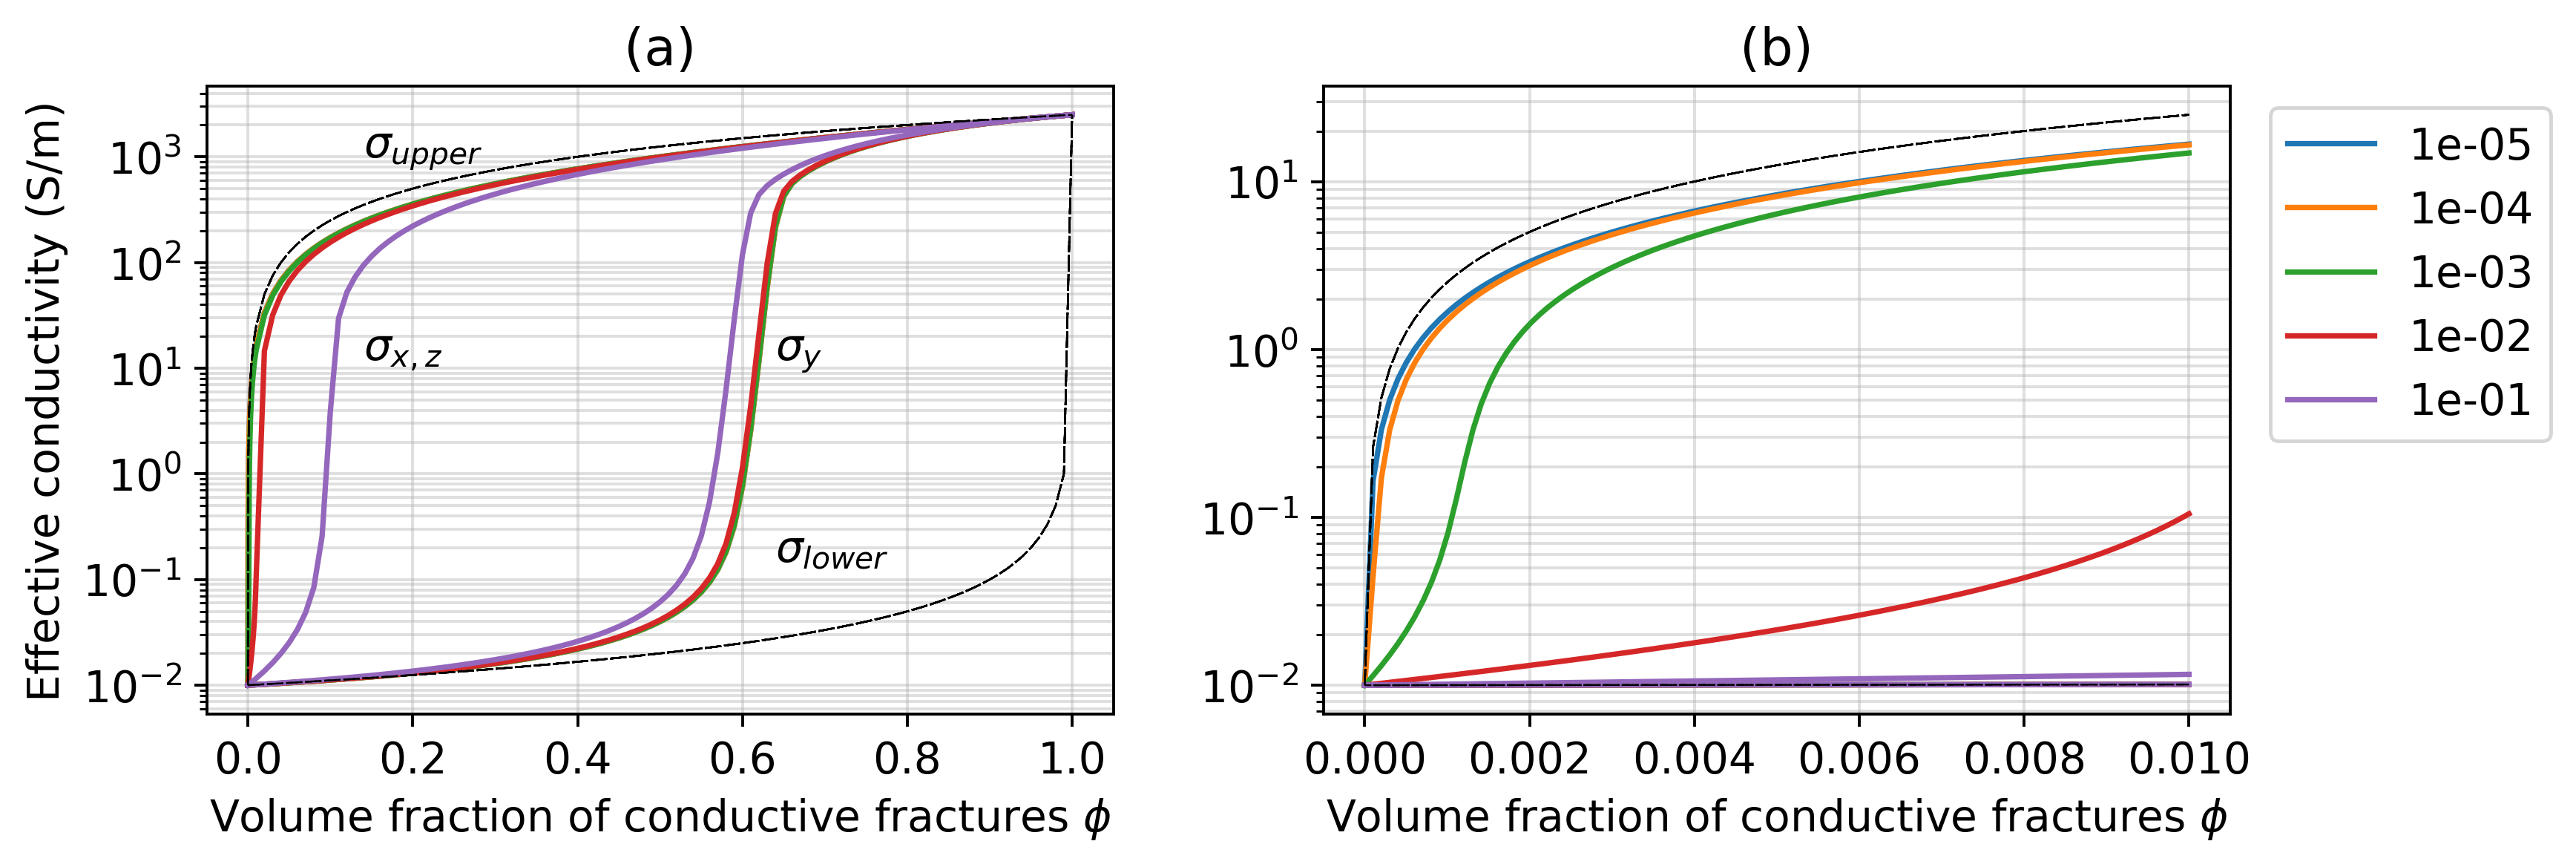

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3.5), dpi=350)

for i, a in enumerate(ax):
    for j, alp in enumerate(alphas[:-1]):
        if i == 0: 
            inds = np.ones(len(phi), dtype=bool)
        elif i == 1: 
            inds = phi <= phi_frac
        
        a.semilogy(phi[inds], sx[inds, j], "C{}".format(j), label="{:1.0e}".format(alp))
        a.semilogy(phi[inds], sy[inds, j], "C{}".format(j))
        a.semilogy(phi[inds], wl[inds, 0], 'k--', lw=0.5)
        a.semilogy(phi[inds], wu[inds, 0], 'k--', lw=0.5)
        a.semilogy(phi[inds], hl[inds, 0], 'k-.', lw=0.5)
        a.semilogy(phi[inds], hu[inds, 0], 'k-.', lw=0.5)
        
    a.grid(which="both", alpha=0.4)

    a.set_xlabel('Volume fraction of conductive fractures $\phi$')
    a.set_title("({})".format(ascii_lowercase[i]))

ax[0].set_ylabel('Effective conductivity (S/m)')

ax[0].annotate("$\sigma_{upper}$", (0.14, 1000))
ax[0].annotate("$\sigma_{lower}$", (0.64, 1.5e-1))

ax[0].annotate("$\sigma_{x, z}$", (0.14, 12))
ax[0].annotate("$\sigma_{y}$", (0.64, 12))


ax[1].legend(bbox_to_anchor=[1.02, 1.])

plt.tight_layout()

fig.savefig("../figures/aligned_fractures", dpi=350, bbox_inches="tight")

In [8]:
se = np.zeros((len(phi), len(alphas)))
wl = np.zeros((len(phi), len(alphas)))
wu = np.zeros((len(phi), len(alphas)))
hl = np.zeros((len(phi), len(alphas)))
hu = np.zeros((len(phi), len(alphas)))

scemt.random = True
scemt._sigstart = None
for j, a in enumerate(alphas):
    scemt.alpha1 = a
    for i, p in enumerate(phi):
        s = scemt*np.r_[p]
        w = scemt.wiener_bounds(p)
        h = scemt.hashin_shtrikman_bounds(p)
        
        se[i, j] = s
        
        wl[i, j] = w[0]
        wu[i, j] = w[1]
        
        hl[i, j] = h[0]
        hu[i, j] = h[1]

/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:714: UserWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached')


FileNotFoundError: [Errno 2] No such file or directory: 'figures/random_fractures.png'

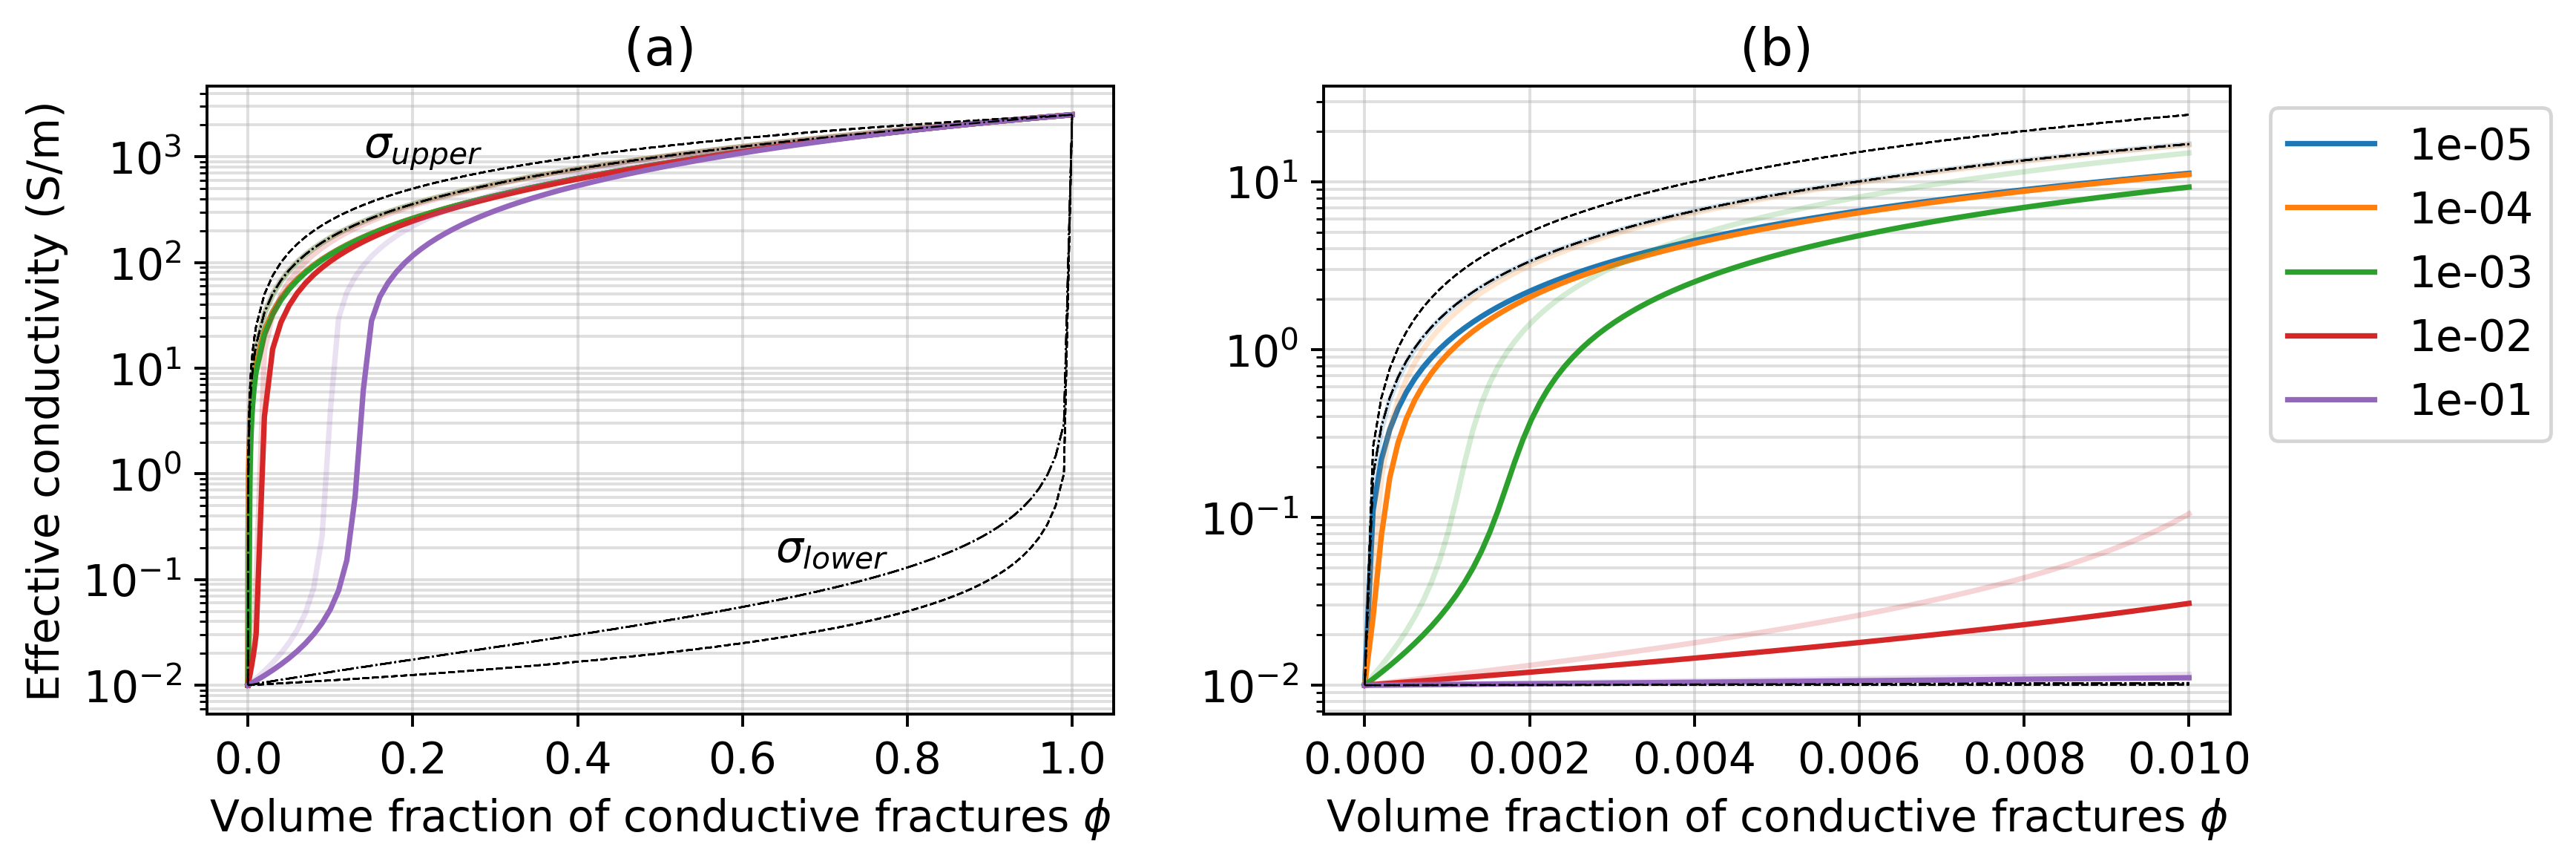

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3.5), dpi=350)

for i, a in enumerate(ax):
    for j, alp in enumerate(alphas[:-1]):
        if i == 0: 
            inds = np.ones(len(phi), dtype=bool)
        elif i == 1: 
            inds = phi <= phi_frac
        
        a.semilogy(phi[inds], sx[inds, j], "C{}".format(j), alpha=0.2)
        a.semilogy(phi[inds], se[inds, j], "C{}".format(j), label="{:1.0e}".format(alp))
        a.semilogy(phi[inds], wl[inds, 0], 'k--', lw=0.5)
        a.semilogy(phi[inds], wu[inds, 0], 'k--', lw=0.5)
        a.semilogy(phi[inds], hl[inds, 0], 'k-.', lw=0.5)
        a.semilogy(phi[inds], hu[inds, 0], 'k-.', lw=0.5)
        
    a.grid(which="both", alpha=0.4)

    a.set_xlabel('Volume fraction of conductive fractures $\phi$')
    a.set_title("({})".format(ascii_lowercase[i]))

ax[0].set_ylabel('Effective conductivity (S/m)')

ax[0].annotate("$\sigma_{upper}$", (0.14, 1000))
ax[0].annotate("$\sigma_{lower}$", (0.64, 1.5e-1))


ax[1].legend(bbox_to_anchor=[1.02, 1.])

plt.tight_layout()

fig.savefig("figures/random_fractures", dpi=350, bbox_inches="tight")

In [ ]:
i = 30
phi[i]

In [ ]:
sx[i, 0]

In [ ]:
sy[i, 0]

In [ ]:
se[i, 0]